In [3]:
# 特徴量を１つ「bruises（あざの有無）」で　
%matplotlib inline

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
# Scikit-learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [5]:
# スタイルと設定
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [37]:
mushroom_data = pd.read_csv('mushrooms.csv')

In [38]:
mushroom_data.describe()
# count = データの個数
# unique = ユニークなデータの個数
# top = 最も多いデータの値
# freq = 最も多いデータの値の数

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [39]:
# 欠損値の確認
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [40]:
mushroom_col = mushroom_data.iloc[:, 1:].columns

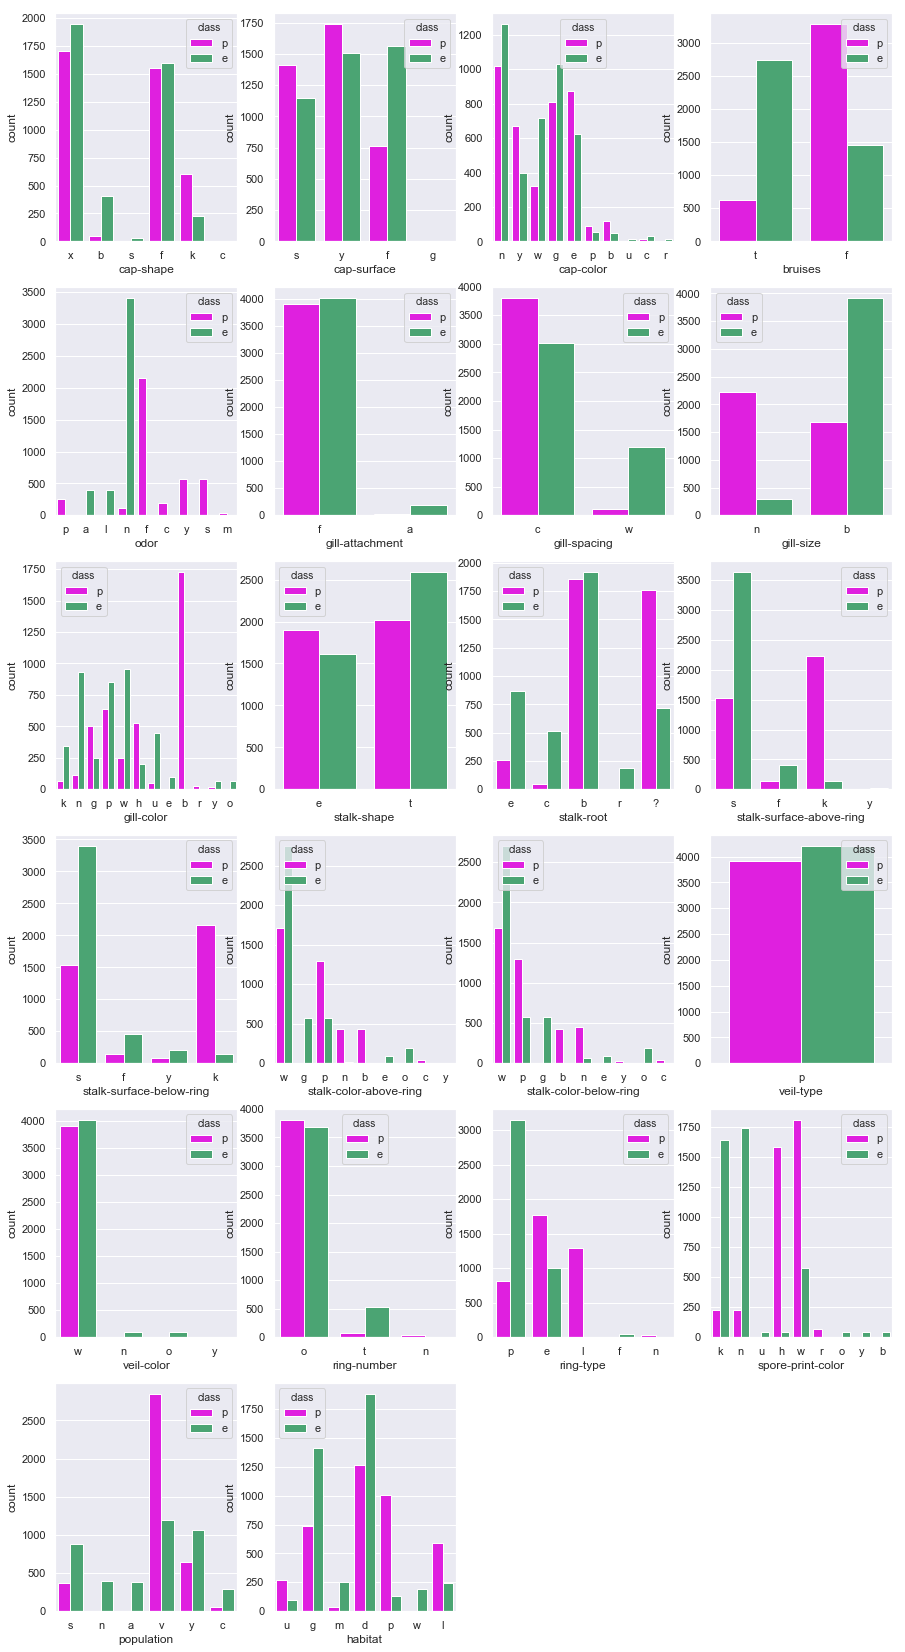

In [55]:
plt.figure(figsize=(15, 21 * 5))
gs = gridspec.GridSpec(21, 4)
for i , col in enumerate(mushroom_data[mushroom_col]):
    ax = plt.subplot(gs[i])
    sns.countplot(x=col, hue='class', palette=['fuchsia', 'mediumseagreen'], data=mushroom_data)

In [52]:
type(gs), gs[0]

(matplotlib.gridspec.GridSpec,
 <matplotlib.gridspec.SubplotSpec at 0x16ee7982048>)

In [53]:
print(gs[0])

In [11]:
mushroom_col, mushroom_col.shape

(Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
        'stalk-surface-below-ring', 'stalk-color-above-ring',
        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
        'ring-type', 'spore-print-color', 'population', 'habitat'],
       dtype='object'), (22,))

In [12]:
# 特徴量を「bruises（あざの有無）」を使用
mushroom_data = mushroom_data[['class', 'bruises']]

In [13]:
# ダミー変数に変換
mushroom_convert = pd.get_dummies(mushroom_data, columns=['bruises'], drop_first=True)

In [14]:
# 'class'値を数値に変換
labelEncoder = LabelEncoder()
mushroom_convert['class'] = labelEncoder.fit_transform(mushroom_convert['class'])

In [15]:
mushroom_convert['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [16]:
# 訓練データとテストデータに分割
train_set, test_set = train_test_split(mushroom_convert, test_size=0.2, random_state=42)

In [17]:
train_set.shape, test_set.shape

((6499, 2), (1625, 2))

In [18]:
# 訓練データの特徴量と正解を分ける
X_train = train_set.drop('class', axis=1)
y_train = train_set['class'].copy()

# テストデータの特徴量と正解を分ける
X_test = test_set.drop('class', axis=1)
y_test = test_set['class'].copy()

In [19]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
X_tr = train_set.iloc[:, 1:]
y_tr = train_set.iloc[:, :1]

In [21]:
# ロジスティック回帰で訓練
logclassifier = LogisticRegression(solver='liblinear')
logclassifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
# とりあえず、訓練済みモデルを使用して訓練データで検証
y_pred = logclassifier.predict(X_train)

In [23]:
# 評価
cnf_matrix = confusion_matrix(y_train, y_pred)

In [24]:
cnf_matrix

array([[2205, 1160],
       [ 492, 2642]], dtype=int64)

In [25]:
# 正解率
accuracy_score(y_train, y_pred)

0.7458070472380366

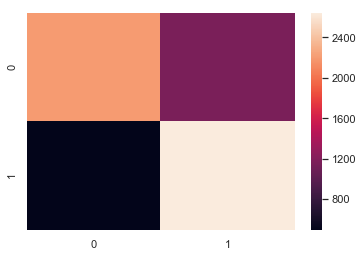

In [26]:
sns.heatmap(cnf_matrix)

In [27]:
# 適合率
precision_score(y_train, y_pred)

0.6948974224092583

In [28]:
# 再現率
recall_score(y_train, y_pred)

0.8430121250797703

In [29]:
# F1値
f1_score(y_train, y_pred)

0.7618223760092272

In [30]:
# 訓練済みモデルを使用してテストデータで検証
y_pred2 = logclassifier.predict(X_test)

In [31]:
# 評価
cnf_matrix2 = confusion_matrix(y_test, y_pred2)

In [32]:
cnf_matrix2

array([[547, 296],
       [132, 650]], dtype=int64)

In [33]:
# 正解率
accuracy_score(y_test, y_pred2)

0.7366153846153846

In [34]:
# 適合率
precision_score(y_test, y_pred2)

0.6871035940803383

In [35]:
# 再現率
recall_score(y_test, y_pred2)

0.8312020460358056

In [36]:
# F1値
f1_score(y_test, y_pred2)

0.7523148148148148